# Project 3: Credit Card Default Detection

#### 1. Given the data below, please classify the two cluster data and find the boundary line to devide the two groups. Use visualization to show your answer. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# % matplotlib inline
from sklearn import metrics, linear_model, tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import datasets, model_selection
import seaborn as sns

#### 2. Following you will need to solve a Credit Card Default Detection Case

* Credit Card Default
    * To default is to fail to make a payment on a debt by the due date. If this happens with a credit card, creditors might raise interest rates to the default (or penalty rate) or decrease the line of credit. In case of serious delinquency, the card issuer can even take legal action to enforce payment or to garnish wages.

* Objective
    * Our objective for this project is, given the data set, we are going to build a machine learning model to predict whether a credit card is going to default

**Data Description:**

**id**: A unique Id field which represents a customer

**X1**: Credit line

**X2**: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**X4**: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. 

**X6** = September, 2015;

**X7** = August, 2015;

**X11** =April, 2015. -1 = pay one month ahead; -2 = pay two month ahead; 0 = pay on time; Positive means the payment delayed months, 1 = delay 1 month, 2 = delay 2 months, etc.

**X12- X17**: Amount in bill statement.

**X12** = amount of bill statementSeptember, 2015

**X13** = amount of bill statementAugust, 2015

**X17** = amount of bill statementApril, 2015. 

**X18-X23**: Amount of previous payment

**X18** = amount paid in September, 2015; 

**X19** = amount paid in August, 2015; 

**X23** = amount paid in April, 2015.

**Y**: A binary response variable to indicate whether the credit card is default (1) or not (0).

This is a real problem to classify multi-feature data into two groups.




# Objective
* In this project, we are going to predict whether a credit card would be default or not. It's a classification problem where the label set is imbalanced since most of the credit cards are normal and only a few of them are default. For this project, we can not only have the chance to train a powerful classification model, but also tackle on the very important problem we might encounter in the future.

## Steps:
1. Perform feature engineering to the dataset the way you see fit.
2. Choose a classifier you like to make prediction
3. Keep in mind that the labels in target variable is imbalanced and figure out a way to deal with that problem

**Hint for steps**
1.	Load data
2.	There are so many features, please discern the categorical and continuous variables.
3.	Check if features have linear relationship between each other.
5.	Choose the proper method to train the model:
6.	Evaluate your model. 
7.	Use your model to train the data. And make your submission file.

## 1. Data Reading

In [2]:
input_raw = pd.read_csv('raw_data.csv')

## 2. Basic data analysis

### ---1) input data shape check

In [4]:
# Check input data  shape

input_raw.shape

(25000, 25)

In [4]:
input_raw.head()

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,200000,2,3,1,53,0,0,0,0,...,133207,136159,138741,6500,5000,5000,5100,5000,5400,0
1,2,130000,2,3,2,39,0,0,0,2,...,130814,130758,123468,7500,10000,0,4500,4500,4179,0
2,3,350000,2,1,2,41,0,0,0,0,...,119947,117328,118400,6000,5900,5800,4100,4500,5000,0
3,4,240000,2,2,1,43,1,-2,-2,-1,...,12700,12500,26225,0,0,12700,0,13725,0,0
4,5,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0


### ---2) Missing value check

In [5]:
input_raw.isna().sum().sum()

# No missing value found

0

### ---3) Target distribution check

In [6]:
# Check the distribution of the target

print(input_raw.Y.value_counts())
print(input_raw.Y.value_counts(normalize = True))

# Only 22.2% of data have Y = 1

0    19452
1     5548
Name: Y, dtype: int64
0    0.77808
1    0.22192
Name: Y, dtype: float64


### ---4) Data type check

In [7]:
input_raw.dtypes

# All of them are integer numbers

id     int64
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

### ---5) Find out which features are categorical data

In [3]:
# Find which column is categorical data

categorical_column = []

print("These are likely categorical features:")

for item in input_raw.columns:
    value_count = len(input_raw[item].unique())
    if  (value_count < 10) & (item != 'Y'):
        print("Feature name: {},  value count: {}". format(item, value_count))
        categorical_column.append(item)
        
print("Categorical columns saved: ", categorical_column)

These are likely categorical features:
Feature name: X2,  value count: 2
Feature name: X3,  value count: 7
Feature name: X4,  value count: 4
Categorical columns saved:  ['X2', 'X3', 'X4']


### ---6) Check if there is any linear correlation between different features

(25, 25)


<AxesSubplot:>

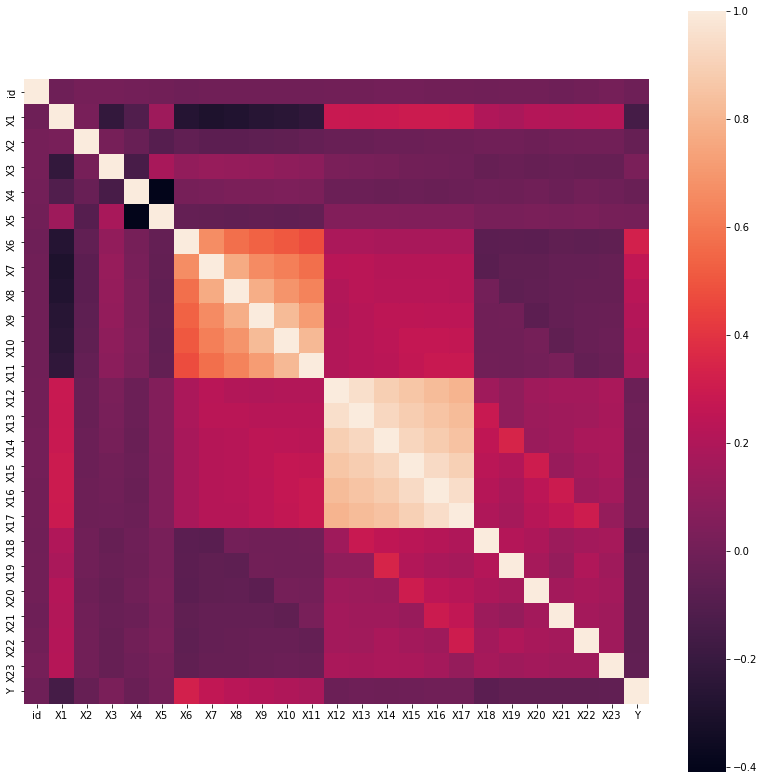

In [9]:
# Show correlation matrix

corr_matrix = input_raw.corr()
print(corr_matrix.shape)

fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr_matrix, square = True)

### Observations:

    - It seems that thre is relatively high correlation between features X12 - X17
    - It makes sense since X12 - X17 are consecutive billing amounts. The billing amount of the current month is likely highly correlated with the billing amounts of the previous months

    - Also, there is some correlation between features X6 - X11
    - It also makes sense since X6 - X11 indicate the payment habit for one person. For the same person, it is very likely that he/she would pay on time or 1 month ahead or delay the payment most of the time

### ---7) Check the distribution of the features

### -------------credit line (X1)

In [43]:
input_raw.X1.min(),input_raw.X1.max() 

(10000, 800000)

<AxesSubplot:>

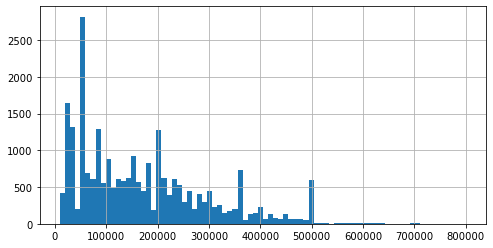

In [46]:
fig, ax = plt.subplots(figsize=(8,4))
input_raw.X1.hist(bins = 80)

# This data is skewed

C:\Users\wymyy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X1', ylabel='Density'>

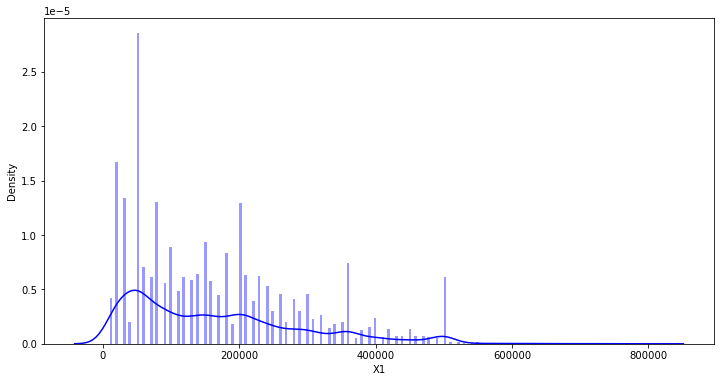

In [49]:
plt.figure(figsize = (12,6))
sns.distplot(input_raw.X1,kde=True,bins=200, color="blue")

### -------------gender (X2)

2    0.60676
1    0.39324
Name: X2, dtype: float64


<AxesSubplot:>

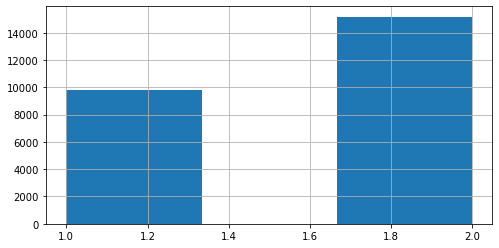

In [12]:
print(input_raw.X2.value_counts(normalize = True))

fig, ax = plt.subplots(figsize=(8,4))
input_raw.X2.hist(bins = 3)

# Female is more than male

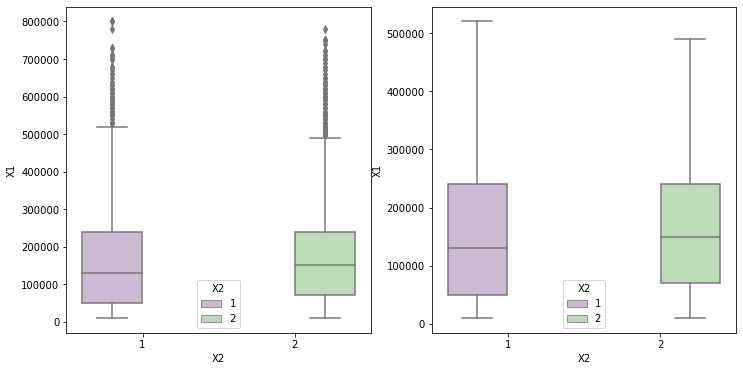

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="X2", y="X1", hue="X2",data=input_raw, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="X2", y="X1", hue="X2",data=input_raw, palette="PRGn",showfliers=False)
plt.show();



### -------------Education (X3)

2    0.46744
1    0.35288
3    0.16400
5    0.00916
4    0.00424
6    0.00180
0    0.00048
Name: X3, dtype: float64


<AxesSubplot:>

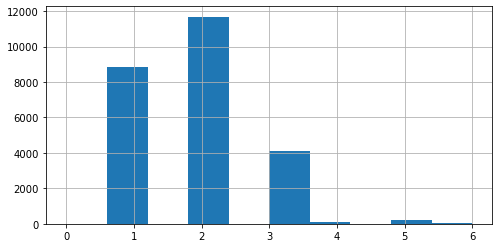

In [13]:
print(input_raw.X3.value_counts(normalize = True))

fig, ax = plt.subplots(figsize=(8,4))
input_raw.X3.hist(bins = 10)

# Majority of people have university or higher degree

### -------------Marital Status (X4)

2    0.53324
1    0.45432
3    0.01080
0    0.00164
Name: X4, dtype: float64


<AxesSubplot:>

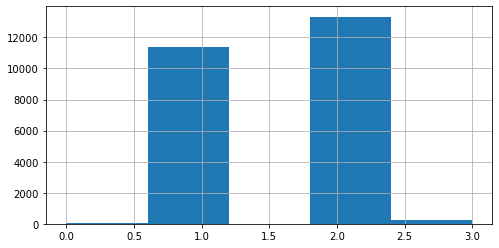

In [14]:
print(input_raw.X4.value_counts(normalize = True))

fig, ax = plt.subplots(figsize=(8,4))
input_raw.X4.hist(bins = 5)


In [36]:
pd.crosstab(input_raw.X4, input_raw.Y)

Y,0,1
X4,,
0,37,4
1,8673,2685
2,10542,2789
3,200,70


In [39]:
gender = input_raw.groupby(['X4', 'Y']).size().unstack(1)
# 1 is the default for unstack, but I put it to show explicitly what we are unstacking
gender

Y,0,1
X4,,
0,37,4
1,8673,2685
2,10542,2789
3,200,70


<AxesSubplot:xlabel='X4'>

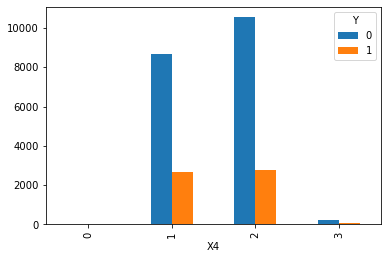

In [42]:
gender.plot(kind='bar', stacked = False)

### -------------Age (X5)

In [15]:
input_raw.X5.min(),input_raw.X5.max() 

(21, 79)

<AxesSubplot:>

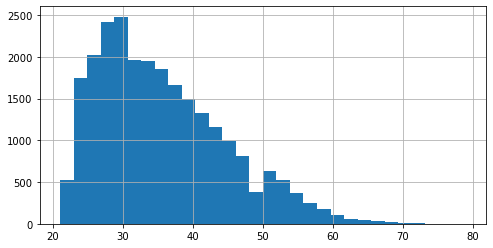

In [16]:
fig, ax = plt.subplots(figsize=(8,4))
input_raw.X5.hist(bins = 30)

# This data is skewed

### -------------history of past payment (X6 - X11)

In [17]:
input_raw.X6.min(),input_raw.X6.max() 

(-2, 8)

<AxesSubplot:>

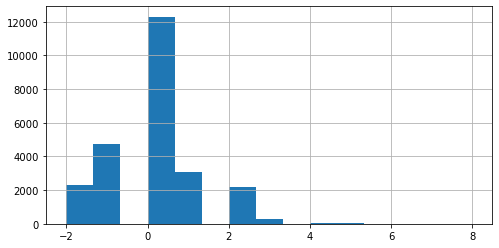

In [18]:
fig, ax = plt.subplots(figsize=(8,4))
input_raw.X6.hist(bins = 15)

### -------------billing statement (X12 - X17)

In [19]:
input_raw.X12.min(),input_raw.X12.max()

# There could be some outliars in the data. The billing amount can be nagetive?

(-165580, 746814)

<AxesSubplot:>

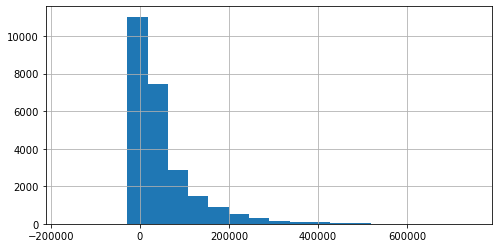

In [20]:
fig, ax = plt.subplots(figsize=(8,4))
input_raw.X12.hist(bins = 20)

### ------------amount paid (X18 - X23)

In [21]:
input_raw.X18.min(),input_raw.X23.max()

# There could be some outliars in the data. Some amount paid is much larger than the rest of the data

(0, 528666)

<AxesSubplot:>

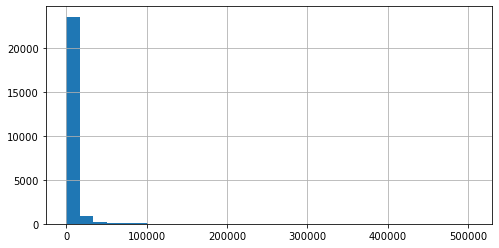

In [22]:
fig, ax = plt.subplots(figsize=(8,4))
input_raw.X18.hist(bins = 30)

## 8) Use one hot to convert categorical features

In [6]:
print("Categorical features: ", categorical_column)

input_onehot = input_raw.copy()

for item in categorical_column:
    one_hot = pd.get_dummies(input_raw[item], prefix= item)
    input_onehot = pd.concat((input_onehot, one_hot), axis = 1)

input_onehot = input_onehot.drop(columns = categorical_column)
    
input_onehot

Categorical features:  ['X2', 'X3', 'X4']


,id,X1,X5,X6,X7,X8,X9,X10,X11,X12,...,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_0,X4_1,X4_2,X4_3
0,1,200000,53,0,0,0,0,0,0,126027,...,0,0,1,0,0,0,0,1,0,0
1,2,130000,39,0,0,0,2,0,0,133825,...,0,0,1,0,0,0,0,0,1,0
2,3,350000,41,0,0,0,0,0,0,122017,...,1,0,0,0,0,0,0,0,1,0
3,4,240000,43,1,-2,-2,-1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5,180000,28,-1,-1,-1,-1,-1,-1,1832,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,300000,56,1,-2,-2,-2,-2,-2,0,...,1,0,0,0,0,0,0,1,0,0
24996,24997,230000,36,0,0,0,2,0,0,3745,...,0,1,0,0,0,0,0,1,0,0
24997,24998,30000,23,2,2,2,2,2,2,34048,...,0,1,0,0,0,0,0,0,1,0
24998,24999,360000,36,0,0,0,0,0,0,28291,...,1,0,0,0,0,0,0,1,0,0


## 9) Remove highly correlated features and outliars

### -------- Since X12-X17 are highly correlated, we may just keep one of them (Say, keep only X12)
### -------- Since X6-X11 are also correlated, we may just keep one or two of them (Say, keep only X6 and X11)

In [7]:
input_onehot_feature_edit = input_onehot.copy()
input_onehot_feature_edit.shape

(25000, 35)

In [8]:
input_onehot_feature_edit = input_onehot_feature_edit.drop(columns = ['X13', 'X14', 'X15', 'X16', 'X17', 'X7', 'X8', 'X9', 'X10'])
input_onehot_feature_edit.shape

(25000, 26)

### -------Billing statement (X12) has some large negative values which we may need to discard

In [9]:
(input_onehot_feature_edit.X12 < -5000).sum()

15

In [10]:
input_onehot_feature_edit = input_onehot_feature_edit[input_onehot_feature_edit.X12 > (-5000)]
input_onehot_feature_edit.shape

(24985, 26)

### ------- The amount pay (X18 - X23) has some very large values which we may need to discard

In [11]:
(input_onehot_feature_edit.X23 > 200000).sum()

39

In [12]:
input_onehot_feature_edit = input_onehot_feature_edit[input_onehot_feature_edit.X23 < 200000]
input_onehot_feature_edit.shape

(24944, 26)

## 10) Apply log function to features that have skewed distribution

### ---------credit line (X1)

In [13]:
input_onehot_feature_edit['log_X1'] = np.log(input_onehot_feature_edit['X1'])
input_onehot_feature_edit.shape

(24944, 27)

<AxesSubplot:>

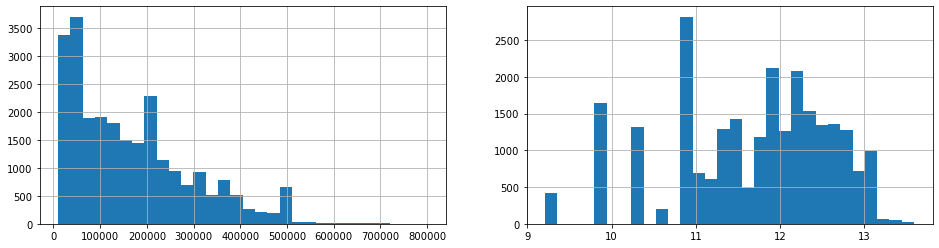

In [14]:
fig = plt.figure(figsize = (16,4))
fig.add_subplot(121)
input_onehot_feature_edit.X1.hist(bins = 30)
fig.add_subplot(122)
input_onehot_feature_edit.log_X1.hist(bins = 30)

### ---------AGE (X5)

In [15]:
input_onehot_feature_edit['log_X5'] = np.log(input_onehot_feature_edit['X5'])
input_onehot_feature_edit.shape

(24944, 28)

<AxesSubplot:>

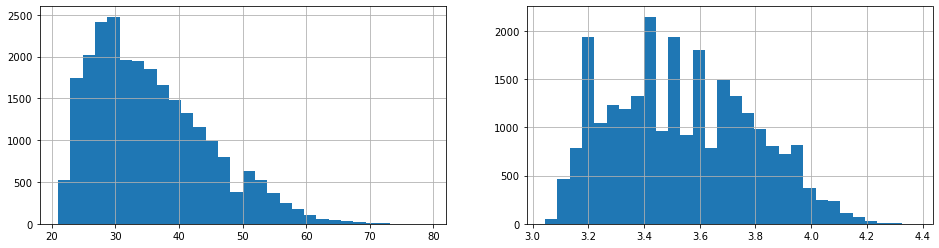

In [16]:
fig = plt.figure(figsize = (16,4))
fig.add_subplot(121)
input_onehot_feature_edit.X5.hist(bins = 30)
fig.add_subplot(122)
input_onehot_feature_edit.log_X5.hist(bins = 30)

In [17]:
# Remove X1 and X5 and only keep the log features

input_onehot_feature_edit = input_onehot_feature_edit.drop(columns = ['X1', 'X5'])
input_onehot_feature_edit.shape

(24944, 26)

### -------------billing statement (X12)

In [18]:
# Since amount paid has negative values, we need to add some constant to prevent having -inf

input_onehot_feature_edit['log_X12'] = np.log(input_onehot_feature_edit['X12'] + 5000)
input_onehot_feature_edit.shape

(24944, 27)

<AxesSubplot:>

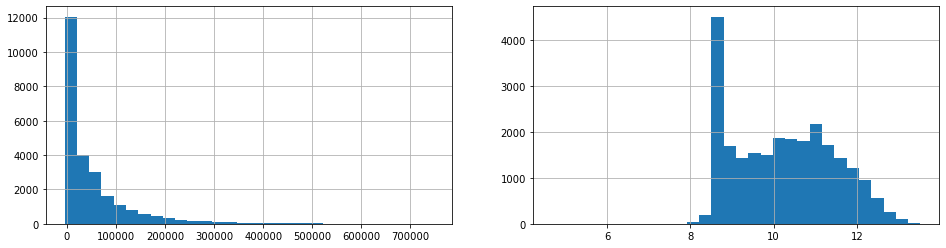

In [19]:
fig = plt.figure(figsize = (16,4))
fig.add_subplot(121)
input_onehot_feature_edit.X12.hist(bins = 30)
fig.add_subplot(122)
input_onehot_feature_edit.log_X12.hist(bins = 30)

### -----------amount paid (X18 - X23)

In [20]:
# Since amount paid has zero values, we need to add some constant to prevent having -inf

input_onehot_feature_edit['log_X18'] = np.log(input_onehot_feature_edit['X18'] + 100)
input_onehot_feature_edit['log_X19'] = np.log(input_onehot_feature_edit['X19'] + 100)
input_onehot_feature_edit['log_X20'] = np.log(input_onehot_feature_edit['X20'] + 100)
input_onehot_feature_edit['log_X21'] = np.log(input_onehot_feature_edit['X21'] + 100)
input_onehot_feature_edit['log_X22'] = np.log(input_onehot_feature_edit['X22'] + 100)
input_onehot_feature_edit['log_X23'] = np.log(input_onehot_feature_edit['X23'] + 100)
input_onehot_feature_edit.shape

(24944, 33)

<AxesSubplot:>

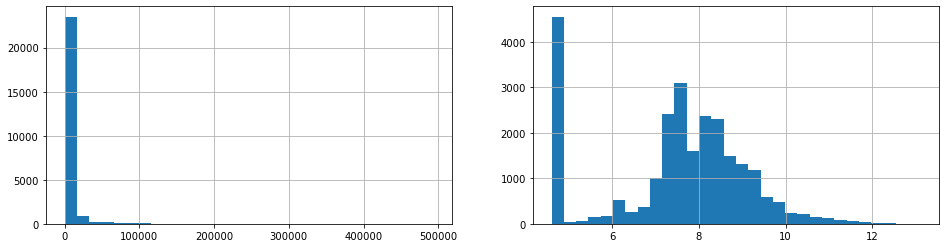

In [21]:
fig = plt.figure(figsize = (16,4))
fig.add_subplot(121)
input_onehot_feature_edit.X18.hist(bins = 30)
fig.add_subplot(122)
input_onehot_feature_edit.log_X18.hist(bins = 30)

## 11) Prepare the train and test data

In [22]:
X = input_onehot_feature_edit.drop(columns = ['id', 'Y'])
Y = input_onehot_feature_edit['Y']

In [23]:
X.head()

,X6,X11,X12,X18,X19,X20,X21,X22,X23,X2_1,...,X4_3,log_X1,log_X5,log_X12,log_X18,log_X19,log_X20,log_X21,log_X22,log_X23
0,0,0,126027,6500,5000,5000,5100,5000,5400,0,...,0,12.206073,3.970292,11.783159,8.794825,8.536996,8.536996,8.556414,8.536996,8.612503
1,0,0,133825,7500,10000,0,4500,4500,4179,0,...,0,11.775290,3.663562,11.840969,8.935904,9.220291,4.605170,8.433812,8.433812,8.361475
2,0,0,122017,6000,5900,5800,4100,4500,5000,0,...,0,12.765688,3.713572,11.752076,8.716044,8.699515,8.682708,8.342840,8.433812,8.536996
3,1,0,0,0,0,12700,0,13725,0,0,...,0,12.388394,3.761200,8.517193,4.605170,4.605170,9.457200,4.605170,9.534234,4.605170
4,-1,-1,1832,0,416,332,500,3500,832,1,...,0,12.100712,3.332205,8.829373,4.605170,6.246107,6.068426,6.396930,8.188689,6.837333


In [24]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Y, dtype: int64

In [25]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size=0.75)

In [26]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((18708, 31), (18708,), (6236, 31), (6236,))

In [27]:
Y_train.value_counts(normalize = True)

0    0.776139
1    0.223861
Name: Y, dtype: float64

In [28]:
Y_test.value_counts(normalize = True)

0    0.783194
1    0.216806
Name: Y, dtype: float64

## 12) Model fitting

In [29]:
def check_accuracy_v2(label, prediction):
    print("Accuracy: ")
    print(metrics.accuracy_score(label, prediction))

    print("Precision: ")
    print(metrics.precision_score(label, prediction, pos_label=1))

    print("Recall: ")
    print(metrics.recall_score(label, prediction, pos_label=1))
    
    print("f1 score: ")
    print(metrics.f1_score(label, prediction, pos_label=1))   

### -----1) Logistical Regression

In [30]:
credit_lm_lr = linear_model.LogisticRegression(max_iter = 5000)
%time credit_lm_lr.fit(X_train, Y_train)

Wall time: 115 ms


LogisticRegression(max_iter=5000)

In [31]:
print("For training data:")
check_accuracy_v2(Y_train, credit_lm_lr.predict(X_train))
print()
print("For testing data:")
check_accuracy_v2(Y_test, credit_lm_lr.predict(X_test))

For training data:
Accuracy: 
0.7790250160359204
Precision: 
1.0
Recall: 
0.0002418379685610641
f1 score: 
0.00048355899419729207

For testing data:
Accuracy: 
0.7746953175112251
Precision: 
0.0
Recall: 
0.0
f1 score: 
0.0


C:\Users\wymyy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ------3) Decision Tree

In [58]:
credit_t_dtc = tree.DecisionTreeClassifier(max_depth=6)
%time  credit_t_dtc.fit(X_train, Y_train)

Wall time: 132 ms


DecisionTreeClassifier(max_depth=6)

In [59]:
print("For training data:")
check_accuracy_v2(Y_train, credit_t_dtc.predict(X_train))
print()
print("For testing data:")
check_accuracy_v2(Y_test, credit_t_dtc.predict(X_test))

For training data:
Accuracy: 
0.8231237973059654
Precision: 
0.6774323778764635
Recall: 
0.40066857688634194
f1 score: 
0.5035258814703676

For testing data:
Accuracy: 
0.8213598460551635
Precision: 
0.6491228070175439
Recall: 
0.3831360946745562
f1 score: 
0.48186046511627906


### ------3a) Use grid search to find the best parameter combination

In [60]:
from sklearn.model_selection import GridSearchCV

In [76]:
# define the parameters grid
param_grid = {'max_depth': np.arange(3, 6, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100, None],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
%time grid_tree.fit(X_train, Y_train)
#let's see the best estimator
print(grid_tree.best_params_)
#with its score
print(np.abs(grid_tree.best_score_))

Wall time: 14.6 s
{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 10, 'min_samples_split': 2}
0.8180991800595793


In [81]:
credit_t_dtc2 = tree.DecisionTreeClassifier(max_depth=3, criterion = 'gini', max_leaf_nodes = 10, min_samples_split = 2)
%time  credit_t_dtc2.fit(X_train, Y_train)

Wall time: 80.2 ms


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10)

In [82]:
print("For training data:")
check_accuracy_v2(Y_train, credit_t_dtc2.predict(X_train))
print()
print("For testing data:")
check_accuracy_v2(Y_test, credit_t_dtc2.predict(X_test))

For training data:
Accuracy: 
0.8190079110540945
Precision: 
0.71397616468039
Recall: 
0.31561302681992337
f1 score: 
0.4377283294586516

For testing data:
Accuracy: 
0.8205580500320718
Precision: 
0.6998368678629691
Recall: 
0.31451612903225806
f1 score: 
0.43399089529590285


### -----3b) Practice using KFold

In [83]:
from sklearn.model_selection import KFold

In [109]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []


for i,(train_index, test_index) in enumerate(kf.split(X_train)):
    credit_t_dtc3 = tree.DecisionTreeClassifier(max_depth=6)
    feats = X_train.iloc[train_index,:]
    label = Y_train.iloc[train_index]
    valid_feats = X_train.iloc[test_index,:]
    valid_label = Y_train.iloc[test_index]
    credit_t_dtc3.fit(feats,label)
    pred = credit_t_dtc3.predict(valid_feats)
    score = metrics.accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)

In [112]:
print(np.array(scr).mean(), np.array(scr).max(), np.array(scr).min())

0.8157472678772543 0.8268305718866916 0.8017103153393907


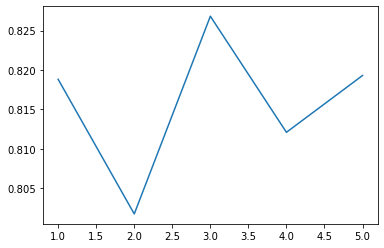

In [110]:
plt.plot(fold,scr)

### -------3c) Get feature importance

In [118]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

In [120]:
features= X_train.columns.tolist()
get_feature_importance(credit_t_dtc, features)

,feat,score
0,X6,0.792118
1,X11,0.042454
26,log_X19,0.034249
22,log_X1,0.022156
5,X20,0.019473
2,X12,0.017972
23,log_X5,0.014288
28,log_X21,0.010435
24,log_X12,0.008207
27,log_X20,0.007928


In [121]:
X_train_simple = X_train[['X6', 'X11']]
X_test_simple = X_test[['X6', 'X11']]

In [122]:
credit_t_dtc4 = tree.DecisionTreeClassifier(max_depth=6)
%time  credit_t_dtc4.fit(X_train_simple, Y_train)

Wall time: 0 ns


DecisionTreeClassifier(max_depth=6)

In [124]:
print("For training data:")
check_accuracy_v2(Y_train, credit_t_dtc4.predict(X_train_simple))
print()
print("For testing data:")
check_accuracy_v2(Y_test, credit_t_dtc4.predict(X_test_simple))

For training data:
Accuracy: 
0.8191682702587129
Precision: 
0.7040658775090067
Recall: 
0.3275862068965517
f1 score: 
0.4471318842948195

For testing data:
Accuracy: 
0.8207184092366901
Precision: 
0.6898148148148148
Recall: 
0.3277126099706745
f1 score: 
0.4443339960238568


### 3d) Visualize Tree Graph

In [34]:
import graphviz
dot_data = tree.export_graphviz(credit_t_dtc, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

### -----3e) Calculate AUC score

In [60]:
roc_auc_score(Y_test, credit_t_dtc.predict_proba(X_test)[:,1])

0.7458799321780091

### -----4) Random forrest

In [32]:
credit_rand_forrest = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=4, random_state=0)
%time credit_rand_forrest.fit(X_train, Y_train)

Wall time: 3.94 s


RandomForestClassifier(min_samples_split=4, random_state=0)

In [33]:
print("For training data:")
check_accuracy_v2(Y_train, credit_rand_forrest.predict(X_train))
print()
print("For testing data:")
check_accuracy_v2(Y_test, credit_rand_forrest.predict(X_test))

For training data:
Accuracy: 
0.995403036134274
Precision: 
0.997573993207181
Recall: 
0.9818529130850048
f1 score: 
0.9896510228640192

For testing data:
Accuracy: 
0.8203976908274535
Precision: 
0.6695906432748538
Recall: 
0.33875739644970415
f1 score: 
0.449901768172888


### ------4a) Calcualte AUC score

In [34]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score(Y_test, credit_rand_forrest.predict_proba(X_test)[:,1])

0.7602747650824573

### -----5) XGboost

In [53]:
import xgboost as xgb

In [54]:
xg_train = xgb.DMatrix(X_train, label = Y_train)
xg_test = xgb.DMatrix(X_test, Y_test)

In [55]:
param = {
    'max_depth': 5,
    'eta': 0.3,
    'objective': 'binary:hinge',
}

epoch = 500

%time credit_xg_model = xgb.train(param, xg_train, epoch)

Wall time: 5.09 s


In [56]:
print("For training data:")
check_accuracy_v2(Y_train, credit_xg_model.predict(xg_train))
print()
print("For testing data:")
check_accuracy_v2(Y_test, credit_xg_model.predict(xg_test))

For training data:
Accuracy: 
0.8556767158434894
Precision: 
0.7877030162412993
Recall: 
0.4863896848137536
f1 score: 
0.6014171833480957

For testing data:
Accuracy: 
0.8154265554842848
Precision: 
0.6270543615676359
Recall: 
0.3668639053254438
f1 score: 
0.4629024731684554


In [61]:
param = {
    'max_depth': 5,
    'eta': 0.3,
    'objective': 'binary:logistic',
}

epoch = 500

%time credit_xg_model2 = xgb.train(param, xg_train, epoch)

[22:24:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 5.35 s


In [65]:
roc_auc_score(Y_test, credit_xg_model2.predict(xg_test))

0.741457963813733

## 13) Dealing with imbalanced data

In [66]:
from sklearn.utils import resample

In [67]:
df_train = X_train.join(Y_train)
df_train.head()

,X6,X11,X12,X18,X19,X20,X21,X22,X23,X2_1,...,log_X1,log_X5,log_X12,log_X18,log_X19,log_X20,log_X21,log_X22,log_X23,Y
3295,0,-1,20571,20000,20006,5676,74306,11889,13347,1,...,13.017003,3.258097,10.149214,9.908475,9.908774,8.661467,11.217292,9.391745,9.506511,0
9568,1,0,17336,1000,1003,1300,900,700,4700,1,...,9.903488,3.091042,10.013955,7.003065,7.005789,7.244228,6.907755,6.684612,8.476371,1
10147,0,0,170792,5729,5365,4664,3890,3899,4724,1,...,12.793859,3.891820,12.077057,8.670601,8.606119,8.468843,8.291547,8.293800,8.481359,0
7010,0,-2,24645,0,14000,0,0,0,0,0,...,11.156251,3.970292,10.297049,4.605170,9.553930,4.605170,4.605170,4.605170,4.605170,0
14908,2,0,802,4541,0,119498,3500,3983,3579,1,...,12.468437,3.784190,8.665958,8.442685,4.605170,11.691891,8.188689,8.314587,8.210396,1


In [69]:
# Separate majority and minority classes
df_majority = df_train[df_train.Y==0]
df_minority = df_train[df_train.Y==1]

print(df_majority.Y.count())
print("-----------")
print(df_minority.Y.count())
print("-----------")
print(df_train.Y.value_counts())

14520
-----------
4188
-----------
0    14520
1     4188
Name: Y, dtype: int64


### -------- Upsampling the minority class

In [71]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=14520,    # to match majority class
                                 random_state=1) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.Y.value_counts()



1    14520
0    14520
Name: Y, dtype: int64

In [75]:
df_upsampled.head()

,X6,X11,X12,X18,X19,X20,X21,X22,X23,X2_1,...,log_X1,log_X5,log_X12,log_X18,log_X19,log_X20,log_X21,log_X22,log_X23,Y
3295,0,-1,20571,20000,20006,5676,74306,11889,13347,1,...,13.017003,3.258097,10.149214,9.908475,9.908774,8.661467,11.217292,9.391745,9.506511,0
10147,0,0,170792,5729,5365,4664,3890,3899,4724,1,...,12.793859,3.891820,12.077057,8.670601,8.606119,8.468843,8.291547,8.293800,8.481359,0
7010,0,-2,24645,0,14000,0,0,0,0,0,...,11.156251,3.970292,10.297049,4.605170,9.553930,4.605170,4.605170,4.605170,4.605170,0
12322,0,0,193083,21507,15020,20007,20007,15912,26402,0,...,13.122363,3.806662,12.196441,9.980773,9.623774,9.908823,9.908823,9.681094,10.184975,0
15098,0,0,78293,3161,4000,3000,3500,3100,5700,0,...,11.289782,3.367296,11.330120,8.089789,8.318742,8.039157,8.188689,8.070906,8.665613,0


In [76]:
df_upsampled_X_train = df_upsampled.drop(columns = 'Y')
df_upsampled_Y_train = df_upsampled['Y']
print(df_upsampled_X_train.shape, df_upsampled_Y_train.shape)

(29040, 31) (29040,)


In [77]:
credit_rand_forrest_upsample = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=4, random_state=0)
%time credit_rand_forrest_upsample.fit(df_upsampled_X_train, df_upsampled_Y_train)

Wall time: 5.54 s


RandomForestClassifier(min_samples_split=4, random_state=0)

In [79]:
print("For training data:")
check_accuracy_v2(Y_train, credit_rand_forrest_upsample.predict(X_train))
print()
print("For testing data:")
check_accuracy_v2(Y_test, credit_rand_forrest_upsample.predict(X_test))

For training data:
Accuracy: 
0.9940132563609151
Precision: 
0.9968308142369576
Recall: 
0.9763610315186246
f1 score: 
0.9864897466827504

For testing data:
Accuracy: 
0.8195958948043618
Precision: 
0.6248624862486248
Recall: 
0.42011834319526625
f1 score: 
0.5024325519681556


In [98]:
roc_auc_score(Y_test, credit_rand_forrest_upsample.predict_proba(X_test)[:,1])

0.7658648091340399

### -----Downsampling majority class

In [80]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4188,     # to match minority class
                                 random_state=1) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.Y.value_counts()

1    4188
0    4188
Name: Y, dtype: int64

In [81]:
df_downsampled_X_train = df_downsampled.drop(columns = 'Y')
df_downsampled_Y_train = df_downsampled['Y']
print(df_downsampled_X_train.shape, df_downsampled_Y_train.shape)

(8376, 31) (8376,)


In [82]:
credit_rand_forrest_downsample = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=4, random_state=0)
%time credit_rand_forrest_downsample.fit(df_downsampled_X_train, df_downsampled_Y_train)

Wall time: 1.68 s


RandomForestClassifier(min_samples_split=4, random_state=0)

In [83]:
print("For training data:")
check_accuracy_v2(Y_train, credit_rand_forrest_downsample.predict(X_train))
print()
print("For testing data:")
check_accuracy_v2(Y_test, credit_rand_forrest_downsample.predict(X_test))

For training data:
Accuracy: 
0.8574941201624974
Precision: 
0.6112247880736627
Recall: 
0.998567335243553
f1 score: 
0.7582955575702629

For testing data:
Accuracy: 
0.7262668377164849
Precision: 
0.41678387248007503
Recall: 
0.6575443786982249
f1 score: 
0.5101865136298422


In [97]:
roc_auc_score(Y_test, credit_rand_forrest_downsample.predict_proba(X_test)[:,1])

0.7703129013225166

### ------- SMOTE (synthetic)

In [84]:
from imblearn.over_sampling import SMOTE

In [89]:
sm = SMOTE(random_state=1, sampling_strategy = 1.0)
X_SMOTE, Y_SMOTE = sm.fit_sample(X_train, Y_train)
print(Y_SMOTE.value_counts())

1    14520
0    14520
Name: Y, dtype: int64


In [90]:
credit_rand_forrest_smote = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=4, random_state=0)
%time credit_rand_forrest_smote.fit(X_SMOTE, Y_SMOTE)

Wall time: 5.73 s


RandomForestClassifier(min_samples_split=4, random_state=0)

In [91]:
print("For training data:")
check_accuracy_v2(Y_train, credit_rand_forrest_smote.predict(X_train))
print()
print("For testing data:")
check_accuracy_v2(Y_test, credit_rand_forrest_smote.predict(X_test))

For training data:
Accuracy: 
0.9973807996579004
Precision: 
0.995688622754491
Recall: 
0.9925978987583572
f1 score: 
0.9941408585435848

For testing data:
Accuracy: 
0.8078896728672226
Precision: 
0.5763888888888888
Recall: 
0.4297337278106509
f1 score: 
0.49237288135593216


In [96]:
roc_auc_score(Y_test, credit_rand_forrest_smote.predict_proba(X_test)[:,1])

0.7612533862533863

### ------- Change class weight in Random Forrest

In [93]:
credit_rand_forrest_weighted = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=4, random_state=0, class_weight = {0:1,1:4})
%time credit_rand_forrest_weighted.fit(X_train, Y_train)

Wall time: 3.85 s


RandomForestClassifier(class_weight={0: 1, 1: 4}, min_samples_split=4,
                       random_state=0)

In [94]:
print("For training data:")
check_accuracy_v2(Y_train, credit_rand_forrest_weighted.predict(X_train))
print()
print("For testing data:")
check_accuracy_v2(Y_test, credit_rand_forrest_weighted.predict(X_test))

For training data:
Accuracy: 
0.9974877057943126
Precision: 
0.9895956490896193
Recall: 
0.9992836676217765
f1 score: 
0.9944160627301889

For testing data:
Accuracy: 
0.8228030788967287
Precision: 
0.6640106241699867
Recall: 
0.3698224852071006
f1 score: 
0.4750593824228028


In [95]:
roc_auc_score(Y_test, credit_rand_forrest_weighted.predict_proba(X_test)[:,1])

0.7693743366820289